In [14]:
import qiskit, sys
import numpy as np
import qtm.qcompilation, qtm.ansatz, qtm.constant
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
print(qtm.constant.noise_prob)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.04


In [15]:
num_qubits = 5
num_layers = 2
thetas = np.ones(num_layers*num_qubits*2)

compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_polygongraph_ansatz,
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'qng_fubini_study',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)

compiler.fit(num_steps=100, verbose = 1)
print("Done!")

Step:   0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Step: 100%|██████████| 100/100 [01:59<00:00,  1.19s/it]


Done!


In [16]:
compiler.save(path = './tomography/noise_qng_polygon', text=f'{qtm.constant.noise_prob}', save_all = True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


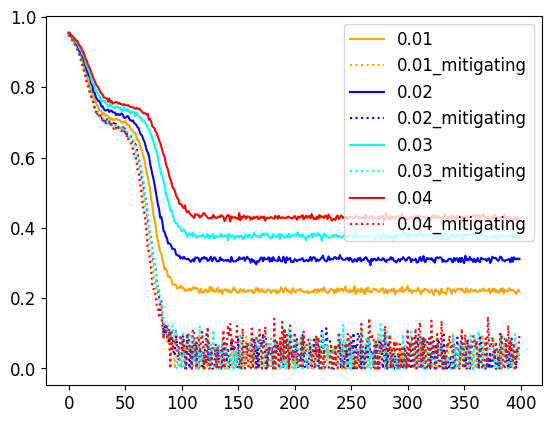

In [33]:
import pandas as pd
noises = [0.01, 0.02, 0.03, 0.04]
color = ["orange", "blue", "cyan", "red"]
i = 0
for noise in noises:
    loss = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + ".csv", sep=",", header=None)
    plt.plot(loss, color = color[i], label = noise)
    loss_mitigating = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
    plt.plot(loss_mitigating, color = color[i], linestyle = "dotted", label = str(noise) + '_mitigating')
    i = i + 1
plt.legend()
plt.savefig('compare_loss_mitigating.eps', format = 'eps', dpi = 1000)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  r

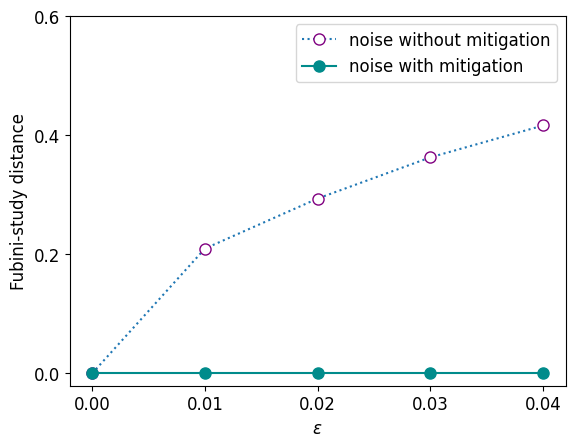

In [34]:
import pandas as pd
color = ["orange", "blue", "cyan", "red"]
losss = []
losss_mitigating = []
noises = [0.0, 0.01, 0.02, 0.03, 0.04]
for noise in noises:
    loss = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + ".csv", sep=",", header=None)
    losss.append(np.min(loss))
    loss_mitigating = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
    losss_mitigating.append(np.min(loss_mitigating))
plt.plot(noises, losss, marker = 'o', mec = 'purple', mfc = 'white', linestyle = 'dotted', markersize = 8, label = 'noise without mitigation')
plt.plot(noises, losss_mitigating, color = 'darkcyan', marker = 'o', markersize = 8, label = 'noise with mitigation')
plt.xticks([0.0, 0.01, 0.02, 0.03, 0.04])
plt.yticks([0.0, 0.2, 0.4, 0.6])
plt.ylabel('Fubini-study distance')
plt.xlabel('$\epsilon$')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.savefig('min_loss_mitigating.eps', format = 'eps', dpi = 1000)